In [1]:
# Imported Libraries

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv', index_col='id')
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data_t = pd.read_csv('test.csv', index_col='id')
data_t.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [4]:
data.shape

(595212, 58)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [6]:
cat_cols = []
num_cols = []
for col in data.columns:
    if (col.split('_')[-1] == 'cat') or (col.split('_')[-1] == 'bin'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
    
print(cat_cols)
print(num_cols)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [7]:
data[cat_cols] = data[cat_cols].astype('object')
data_t[cat_cols] = data_t[cat_cols].astype('object')

In [8]:
def woe_iv(df, feature, target):
    df_woe_iv = (pd.crosstab(df[feature],df[target],
                             normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    return df_woe_iv

In [9]:
woe_iv_list = []

for col in cat_cols:
    woe_iv_list.append([col, woe_iv(data, col, 'target').iv.sum()])
    
    
iv_df = pd.DataFrame(woe_iv_list, columns=['feature', 'iv_sum']).sort_values('iv_sum', ascending=False)
iv_df

,feature,iv_sum
15,ps_car_02_cat,inf
24,ps_car_11_cat,7.121679
19,ps_car_06_cat,0.608709
14,ps_car_01_cat,0.523750
17,ps_car_04_cat,0.349581
2,ps_ind_05_cat,0.328816
22,ps_car_09_cat,0.109332
20,ps_car_07_cat,0.085011
16,ps_car_03_cat,0.082848
3,ps_ind_06_bin,0.069184


In [10]:
pd.crosstab(index = data.target,
            columns = data.ps_car_02_cat,normalize='columns')

ps_car_02_cat,-1,0,1
target,,,
0,1.0,0.950493,0.966228
1,0.0,0.049507,0.033772


In [11]:
data.ps_car_02_cat = data.ps_car_02_cat.replace(-1, data.ps_car_02_cat.mode()[0]).astype('object')

data_t.ps_car_02_cat = data_t.ps_car_02_cat.replace(-1, data.ps_car_02_cat.mode()[0]).astype('object')

In [12]:
pd.crosstab(index = data.target,
            columns = data.ps_car_11_cat,normalize='columns')

ps_car_11_cat,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
target,,,,,,,,,,,,,,,,,,,,,
0,0.959472,0.962005,0.948823,0.939223,0.958044,0.962903,0.974527,0.962515,0.971958,0.974347,...,0.972456,0.96768,0.940701,0.969123,0.976997,0.947582,0.961711,0.966239,0.973333,0.954985
1,0.040528,0.037995,0.051177,0.060777,0.041956,0.037097,0.025473,0.037485,0.028042,0.025653,...,0.027544,0.03232,0.059299,0.030877,0.023003,0.052418,0.038289,0.033761,0.026667,0.045015


In [13]:
data.ps_car_11_cat.value_counts()

104    85083
103    24262
64     22278
87     17106
32     12578
       ...  
58      1464
81      1433
56      1272
18      1233
63      1103
Name: ps_car_11_cat, Length: 104, dtype: int64

In [14]:
data.drop('ps_car_11_cat', axis=1, inplace=True)
data_t.drop('ps_car_11_cat', axis=1, inplace=True)

In [15]:
pd.crosstab(index = data.target,
            columns = data.ps_car_06_cat,normalize='columns')

ps_car_06_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
target,,,,,,,,,,,,,,,,,,
0,0.966627,0.965815,0.934039,0.961824,0.966149,0.932905,0.9632,0.961196,0.930595,0.944996,0.955896,0.96828,0.951383,0.943004,0.965706,0.948877,0.954823,0.93617
1,0.033373,0.034185,0.065961,0.038176,0.033851,0.067095,0.0368,0.038804,0.069405,0.055004,0.044104,0.03172,0.048617,0.056996,0.034294,0.051123,0.045177,0.06383


In [16]:
data.drop('ps_car_06_cat', axis=1, inplace=True)
data_t.drop('ps_car_06_cat', axis=1, inplace=True)

In [17]:
pd.crosstab(index = data.target,
            columns = data.ps_car_01_cat,normalize='columns')

ps_car_01_cat,-1,0,1,2,3,4,5,6,7,8,9,10,11
target,,,,,,,,,,,,,
0,0.682243,0.956131,0.953182,0.95709,0.962451,0.960839,0.960754,0.970237,0.97123,0.956602,0.945579,0.963024,0.958419
1,0.317757,0.043869,0.046818,0.04291,0.037549,0.039161,0.039246,0.029763,0.02877,0.043398,0.054421,0.036976,0.041581


In [18]:
data.ps_car_01_cat.value_counts()

 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: ps_car_01_cat, dtype: int64

In [19]:
data.ps_car_01_cat = data.ps_car_01_cat.replace(-1, data.ps_car_01_cat.mode()[0]).astype('object')

data_t.ps_car_01_cat = data_t.ps_car_01_cat.replace(-1, data.ps_car_01_cat.mode()[0]).astype('object')

In [20]:
cat_cols = []
num_cols = []
for col in data.columns:
    if (col.split('_')[-1] == 'cat') or (col.split('_')[-1] == 'bin'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
    
print(cat_cols)
print(num_cols)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [21]:
woe_iv_list = []

for col in cat_cols:
    woe_iv_list.append([col, woe_iv(data, col, 'target').iv.sum()])
    
    
iv_df = pd.DataFrame(woe_iv_list, columns=['feature', 'iv_sum']).sort_values('iv_sum', ascending=False)
iv_df

,feature,iv_sum
14,ps_car_01_cat,0.444689
17,ps_car_04_cat,0.349581
2,ps_ind_05_cat,0.328816
21,ps_car_09_cat,0.109332
19,ps_car_07_cat,0.085011
16,ps_car_03_cat,0.082848
3,ps_ind_06_bin,0.069184
12,ps_ind_17_bin,0.065777
4,ps_ind_07_bin,0.061634
15,ps_car_02_cat,0.050455


In [22]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [216]
ps_ind_04_cat [83]
ps_ind_05_cat [5809]
ps_reg_03 [107772]
ps_car_03_cat [411231]
ps_car_05_cat [266551]
ps_car_07_cat [11489]
ps_car_09_cat [569]
ps_car_11 [5]
ps_car_12 [1]
ps_car_14 [42620]


In [23]:
data.drop(['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03'], axis=1, inplace=True)

data_t.drop(['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03'], axis=1, inplace=True)

In [24]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [216]
ps_ind_04_cat [83]
ps_ind_05_cat [5809]
ps_car_07_cat [11489]
ps_car_09_cat [569]
ps_car_11 [5]
ps_car_12 [1]
ps_car_14 [42620]


<AxesSubplot:xlabel='ps_car_14', ylabel='Density'>

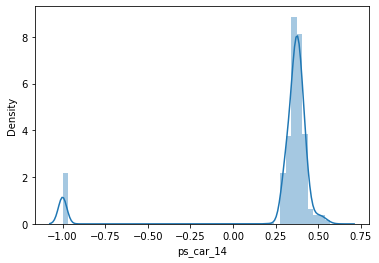

In [25]:
sns.distplot(data.ps_car_14)

In [26]:
data['ps_car_14'] = data['ps_car_14'].replace(-1, data['ps_car_14'].median())

data_t['ps_car_14'] = data_t['ps_car_14'].replace(-1, data['ps_car_14'].median())

In [27]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [216]
ps_ind_04_cat [83]
ps_ind_05_cat [5809]
ps_car_07_cat [11489]
ps_car_09_cat [569]
ps_car_11 [5]
ps_car_12 [1]


In [28]:
data.ps_car_07_cat.value_counts()

 1    553148
 0     30575
-1     11489
Name: ps_car_07_cat, dtype: int64

In [29]:
pd.crosstab(index = data.target,
            columns = data.ps_car_07_cat,normalize='columns')

ps_car_07_cat,-1,0,1
target,,,
0,0.921838,0.948814,0.965234
1,0.078162,0.051186,0.034766


In [30]:
data['ps_car_07_cat'] = data['ps_car_07_cat'].replace(-1, 0).astype('object')

data_t['ps_car_07_cat'] = data_t['ps_car_07_cat'].replace(-1, 0).astype('object')

In [31]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [216]
ps_ind_04_cat [83]
ps_ind_05_cat [5809]
ps_car_09_cat [569]
ps_car_11 [5]
ps_car_12 [1]


In [32]:
data.ps_ind_05_cat.value_counts()

 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64

In [33]:
pd.crosstab(index = data.target,
            columns = data.ps_ind_05_cat,normalize='columns')

ps_ind_05_cat,-1,0,1,2,3,4,5,6
target,,,,,,,,
0,0.916681,0.966135,0.952175,0.924474,0.957002,0.947939,0.951486,0.940664
1,0.083319,0.033865,0.047825,0.075526,0.042998,0.052061,0.048514,0.059336


In [34]:
data.ps_ind_05_cat = data.ps_ind_05_cat.replace(-1, 2).astype('object')

data_t.ps_ind_05_cat = data_t.ps_ind_05_cat.replace(-1, 2).astype('object')

In [35]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [216]
ps_ind_04_cat [83]
ps_car_09_cat [569]
ps_car_11 [5]
ps_car_12 [1]


In [36]:
data.ps_car_09_cat.value_counts()

 2    353482
 0    194518
 1     29080
 3     14756
 4      2807
-1       569
Name: ps_car_09_cat, dtype: int64

In [37]:
pd.crosstab(index = data.target,
            columns = data.ps_car_09_cat,normalize='columns')

ps_car_09_cat,-1,0,1,2,3,4
target,,,,,,
0,0.908612,0.966656,0.943054,0.963681,0.964896,0.9487
1,0.091388,0.033344,0.056946,0.036319,0.035104,0.0513


In [38]:
data = data[~data.ps_car_09_cat==-1]

In [39]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_ind_02_cat [128]
ps_car_11 [3]


In [40]:
data.ps_ind_02_cat.value_counts()

 1    142947
 2     38110
 3      9412
 4      3921
-1       128
Name: ps_ind_02_cat, dtype: int64

In [41]:
pd.crosstab(index = data.target,
            columns = data.ps_ind_02_cat,normalize='columns')

ps_ind_02_cat,-1,1,2,3,4
target,,,,,
0,0.945312,0.967009,0.966282,0.965257,0.961489
1,0.054688,0.032991,0.033718,0.034743,0.038511


In [42]:
data.drop('ps_ind_02_cat', axis=1, inplace=True)

data_t.drop('ps_ind_02_cat', axis=1, inplace=True)

In [43]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

ps_car_11 [3]


In [44]:
data.ps_car_11.value_counts()

 3    80266
 2    77578
 1    27996
 0     8675
-1        3
Name: ps_car_11, dtype: int64

In [45]:
pd.crosstab(index = data.target,
            columns = data.ps_car_11,normalize='columns')

ps_car_11,-1,0,1,2,3
target,,,,,
0,1.0,0.957464,0.974711,0.963417,0.967969
1,0.0,0.042536,0.025289,0.036583,0.032031


In [46]:
data = data[data.ps_car_11!=-1]

In [47]:
for col in data.columns:
    if -1 in data[col].value_counts().index:
        print(col, data[col].value_counts()[data[col].value_counts().index==-1].values)

In [48]:
data.target.value_counts(data.shape[0])

0    0.966656
1    0.033344
Name: target, dtype: float64

In [49]:
cat_cols = []
num_cols = []
for col in data.columns:
    if (col.split('_')[-1] == 'cat') or (col.split('_')[-1] == 'bin'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
    
print(cat_cols)
print(num_cols)

['ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [50]:
woe_iv_list = []

for col in cat_cols:
    woe_iv_list.append([col, woe_iv(data, col, 'target').iv.sum()])
    
    
iv_df = pd.DataFrame(woe_iv_list, columns=['feature', 'iv_sum']).sort_values('iv_sum', ascending=False)
iv_df

,feature,iv_sum
15,ps_car_04_cat,0.408225
13,ps_car_01_cat,0.314605
1,ps_ind_05_cat,0.252160
2,ps_ind_06_bin,0.074955
3,ps_ind_07_bin,0.063484
17,ps_car_08_cat,0.022266
11,ps_ind_17_bin,0.021355
16,ps_car_07_cat,0.014203
10,ps_ind_16_bin,0.012592
14,ps_car_02_cat,0.012514


In [51]:
data.drop(iv_df[iv_df.iv_sum<0.01].feature.values, axis=1, inplace=True)

data_t.drop(iv_df[iv_df.iv_sum<0.01].feature.values, axis=1, inplace=True)

In [52]:
X = data.drop('target', axis=1)
y = data['target']

In [53]:
cat_cols = []
num_cols = []
for col in X.columns:
    if (col.split('_')[-1] == 'cat') or (col.split('_')[-1] == 'bin'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
    
print(cat_cols)
print(num_cols)

['ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_08_cat']
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [54]:
woe_iv_list = []

for col in cat_cols:
    woe_iv_list.append([col, woe_iv(data, col, 'target').iv.sum()])
    
    
iv_df = pd.DataFrame(woe_iv_list, columns=['feature', 'iv_sum']).sort_values('iv_sum', ascending=False)
iv_df

,feature,iv_sum
7,ps_car_04_cat,0.408225
5,ps_car_01_cat,0.314605
0,ps_ind_05_cat,0.252160
1,ps_ind_06_bin,0.074955
2,ps_ind_07_bin,0.063484
9,ps_car_08_cat,0.022266
4,ps_ind_17_bin,0.021355
8,ps_car_07_cat,0.014203
3,ps_ind_16_bin,0.012592
6,ps_car_02_cat,0.012514


In [55]:
data = pd.concat([X, y], axis=1)
data.head()

,ps_ind_01,ps_ind_03,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_reg_01,...,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,target
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,0,1,0,11,0,1,0.7,...,10,1,10,1,5,9,1,5,8,0
19,5,4,0,0,0,0,6,1,0,0.9,...,8,2,11,3,8,4,2,0,9,0
20,2,3,0,0,1,0,8,1,0,0.6,...,8,1,8,3,10,3,0,0,10,0
26,5,3,0,0,0,0,6,1,0,0.9,...,7,3,9,4,11,4,2,1,5,0
35,2,3,0,0,1,0,9,1,0,0.9,...,8,2,10,1,8,9,2,1,10,0


In [56]:
# def woe_encode(df, feature, target):
#     df_woe_iv = (pd.crosstab(df[feature],df[target],
#                              normalize='columns')
#                  .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0])))
#     feature_mapped = df[feature].map(dict(zip(df_woe_iv.index, df_woe_iv.woe)))
#     return feature_mapped

In [57]:
# X2 = data[cat_cols]
# for col in cat_cols:
#     X2[col] = woe_encode(data, col, 'target')

In [58]:
X2 = pd.get_dummies(data[cat_cols], drop_first=True)
X2.head()

,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_ind_06_bin_1,ps_ind_07_bin_1,ps_ind_16_bin_1,ps_ind_17_bin_1,...,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_07_cat_1,ps_car_08_cat_1
id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
19,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
20,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
26,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
35,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
X2_t = pd.get_dummies(data_t[cat_cols], drop_first=True)
X2_t.head()

,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_ind_06_bin_1,ps_ind_07_bin_1,ps_ind_16_bin_1,ps_ind_17_bin_1,...,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_07_cat_1,ps_car_08_cat_1
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [60]:
X2 = pd.concat([data[num_cols], X2, data['target']], axis=1)
X2.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,ps_car_14,...,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_07_cat_1,ps_car_08_cat_1,target
id,,,,,,,,,,,,,,,,,,,,,
7,2,5,0,11,0.7,0.2,2,0.400000,0.883679,0.370810,...,0,0,0,0,0,0,0,1,0,0
19,5,4,0,6,0.9,1.8,2,0.445982,0.879049,0.406202,...,0,0,0,0,0,0,0,1,1,0
20,2,3,0,8,0.6,0.1,2,0.316228,0.639683,0.368782,...,0,0,0,0,0,0,0,1,1,0
26,5,3,0,6,0.9,0.7,3,0.400000,0.780641,0.407431,...,0,0,0,0,0,0,0,1,1,0
35,2,3,0,9,0.9,0.1,3,0.374166,0.954491,0.379342,...,0,0,0,0,0,0,0,1,0,0


In [61]:
X2_t = pd.concat([data_t[num_cols], X2_t], axis=1)
X2_t.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_11,ps_car_12,ps_car_13,ps_car_14,...,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_07_cat_1,ps_car_08_cat_1
id,,,,,,,,,,,,,,,,,,,,,
0,0,8,0,12,0.5,0.3,1,0.316228,0.669556,0.352136,...,0,0,0,0,0,0,0,0,1,1
1,4,5,0,5,0.9,0.5,1,0.316228,0.606320,0.358329,...,0,0,0,0,0,0,0,0,1,1
2,5,3,0,10,0.4,0.0,3,0.400000,0.896239,0.398497,...,0,0,0,0,0,0,0,0,1,1
3,0,6,0,4,0.1,0.2,2,0.374166,0.652110,0.381445,...,0,0,0,0,0,0,0,0,1,1
4,5,7,0,4,0.9,0.4,3,0.374166,0.812914,0.385097,...,0,0,0,0,0,0,0,0,1,1


In [62]:
# data_train, data_val = train_test_split(X2, stratify = X2['target'], test_size=0.15)

In [63]:
scaler = MinMaxScaler()
X2[num_cols] = scaler.fit_transform(X2[num_cols])
X2_t[num_cols] = scaler.transform(X2_t[num_cols])

# data_val[num_cols] = scaler.transform(data_val[num_cols])

In [64]:
X2.to_csv('gen_data.csv')
X2_t.to_csv('data_val.csv')

---------